In [1]:
from classifier import DialogueActClassifierFactory
from joblib import load
from metrics import ConfusionMatrixGenerator
from pandas import DataFrame, option_context, read_csv
from pathlib import Path


clf_grid_search_cv = load('./models/program_comprehension_challenge_gridsearchcv.pickle') 
clf_pipeline_decision_tree = load('./models/program_comprehension_challenge_classifier.pickle') 
dac_factory = DialogueActClassifierFactory()
dac_clf = dac_factory.get_classifier(classifier_file=Path('./models/dialogue_act_classifier.pickle'), test_set_percentage=10)

training_dataset = read_csv('../master-of-engineering/Assets/BigQuery/training_dataset.csv')
test_dataset = read_csv('../master-of-engineering/Assets/BigQuery/test_dataset.csv')

FEATURES = ['body', 'dialogue_act_classification_ml', 'comment_is_by_author']
LABEL = 'program_comprehension_challenge'

X_train = training_dataset[FEATURES]
X_test = test_dataset[FEATURES]
y_train = training_dataset[LABEL]
y_true = test_dataset[LABEL]

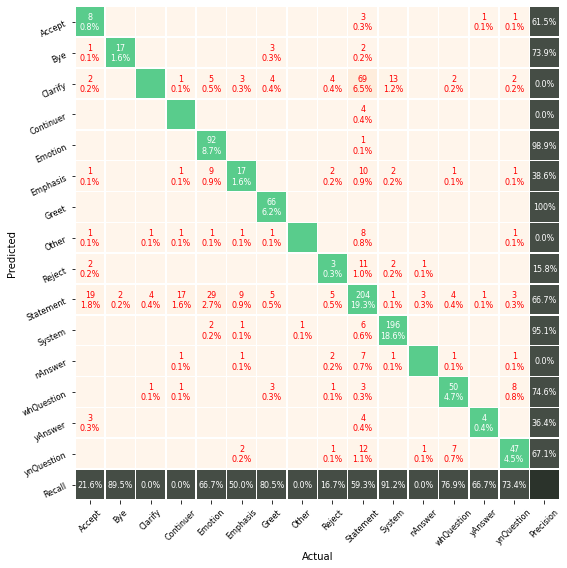

In [2]:
dac_cm = dac_factory.get_confusion_matrix()
ConfusionMatrixGenerator.print_confusion_matrix(dac_cm._confusion, dac_cm._values, number_formatting='.1f', font_size=8)

In [3]:
clf_pipeline_decision_tree.fit(X_train, y_train)
y_pred = clf_pipeline_decision_tree.predict(X_test)

In [4]:
from sklearn import metrics

report = metrics.classification_report(y_true, y_pred, digits=8)
print(report)
cm = metrics.confusion_matrix(y_true, y_pred, labels=["Yes", "No"])

              precision    recall  f1-score   support

          No  0.92857143 0.81981982 0.87081340       111
         Yes  0.61538462 0.82051282 0.70329670        39

    accuracy                      0.82000000       150
   macro avg  0.77197802 0.82016632 0.78705505       150
weighted avg  0.84714286 0.82000000 0.82725906       150



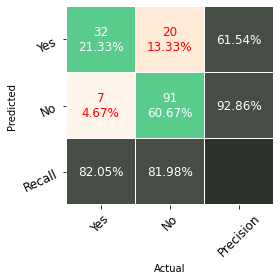

In [5]:
ConfusionMatrixGenerator.print_confusion_matrix(cm, ["Yes", "No"], figsize=[4, 4], number_formatting='.2f', font_size=12)